In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df = pd.read_csv(r'E:\semester 6\Machine Learning\project\vehicle.csv')
print(df.head())

df = df.drop('Class', axis=1)


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Optional: Reduce dimensions to 2D for visualization later >> hnst5dmha fl plots bass
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Shape after scaling: {X_scaled.shape}")
print(f"Shape after PCA: {X_pca.shape}")



   COMPACTNESS  CIRCULARITY  'DISTANCE CIRCULARITY'  'RADIUS RATIO'  \
0           95           48                      83             178   
1           91           41                      84             141   
2          104           50                     106             209   
3           93           41                      82             159   
4           85           44                      70             205   

   'PR.AXIS ASPECT RATIO'  'MAX.LENGTH ASPECT RATIO'  'SCATTER RATIO'  \
0                      72                         10              162   
1                      57                          9              149   
2                      66                         10              207   
3                      63                          9              144   
4                     103                         52              149   

   ELONGATEDNESS  'PR.AXIS RECTANGULARITY'  'MAX.LENGTH RECTANGULARITY'  \
0             42                        20                 

# K-means from scratch

In [ ]:
import numpy as np

class KMeansFromScratch:
    def __init__(self, k=3, max_iters=300, tolerance=1e-4, random_state=None):
        self.n_clusters = k
        self.max_iters = max_iters
        self.tolerance = tolerance
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None

    def fit(self, X):
        np.random.seed(self.random_state)
        self._initialize_centroids(X)

        for iteration in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._compute_new_centroids(X, labels)
            
            if self._is_converged(new_centroids):
                break
            
            self.centroids = new_centroids
        
        self.labels_ = self._assign_clusters(X)

    def predict(self, X):
        return self._assign_clusters(X)

    def _initialize_centroids(self, X):
        n_samples = X.shape[0]
        random_idx = np.random.permutation(n_samples)[:self.n_clusters]
        self.centroids = X[random_idx]

    def _assign_clusters(self, X):
        distances = self._compute_distances(X)
        return np.argmin(distances, axis=1)

    def _compute_new_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for idx in range(self.n_clusters):
            if np.any(labels == idx):
                centroids[idx] = X[labels == idx].mean(axis=0)
            else:
                centroids[idx] = self.centroids[idx]  # Keep old centroid if cluster is empty
        return centroids

    def _is_converged(self, new_centroids):
        shift = np.linalg.norm(self.centroids - new_centroids)
        return shift < self.tolerance

    def _compute_distances(self, X):
        return np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)


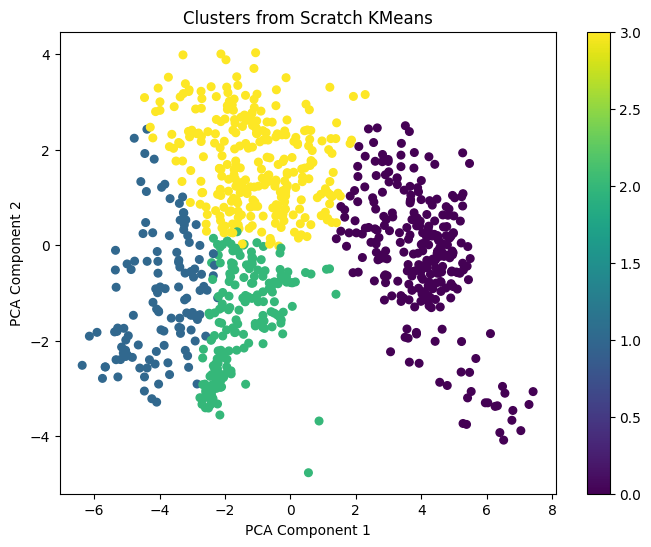

In [21]:
import matplotlib.pyplot as plt

# Using the KMeansFromScratch class we wrote earlier
kmeans_scratch = KMeansFromScratch(k=4, max_iters=300, random_state=42)
kmeans_scratch.fit(X_scaled)

# Get the predicted cluster labels
labels_scratch = kmeans_scratch.predict(X_scaled)

# Plotting function
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar()
    plt.show()

# Visualize
plot_clusters(X_pca, labels_scratch, "Clusters from Scratch KMeans")


# K-means using sklearn

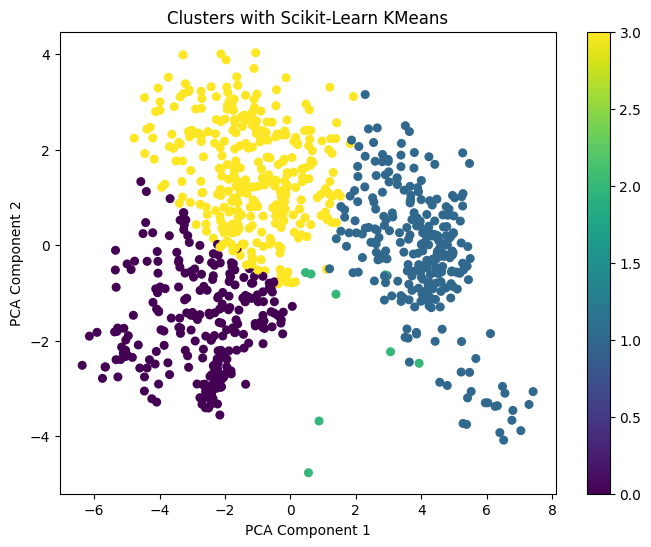

In [23]:
from sklearn.cluster import KMeans

# Using scikit-learn's built-in KMeans
kmeans_sklearn = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_sklearn.fit(X_scaled)

labels_sklearn = kmeans_sklearn.labels_

# Visualize
plot_clusters(X_pca, labels_sklearn, "Clusters with Scikit-Learn KMeans")
